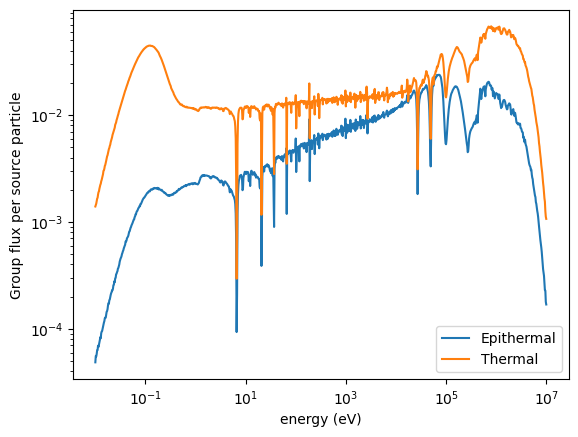

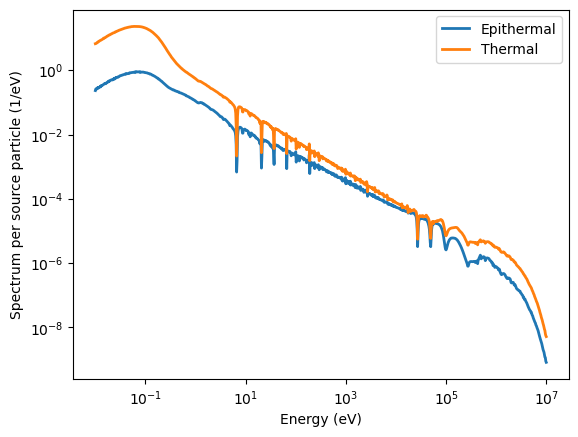

In [13]:
import openmc
import matplotlib.pyplot as plt

plt.figure(1)

plt.figure(2)

labels = ["Epithermal", "Thermal"]

for i, filename in enumerate(["epithermal_res", "thermal_res"]):
    file = f"{filename}/statepoint.350.h5"
    sp = openmc.StatePoint(file)


    tallydf1=sp.tallies[1].get_pandas_dataframe()
    # print(tallydf1.head())

    tallydf1flux=tallydf1[tallydf1['score']=='flux']
    # print(tallydf1flux.head())

    energy=(tallydf1flux['energy low [eV]']+tallydf1flux['energy high [eV]'])/2
    
    plt.figure(1)
    plt.loglog(energy,tallydf1flux['mean'], label=labels[i])



    deltaE=(tallydf1flux['energy high [eV]']-tallydf1flux['energy low [eV]'])
    plt.figure(2)
    plt.loglog(energy,tallydf1flux['mean']/deltaE,lw=2, label=labels[i])

    

plt.figure(1)
plt.xlabel('energy (eV)')
plt.ylabel('Group flux per source particle')
plt.legend()
plt.savefig("group_plux_per_source_particle.pdf")


plt.figure(2)
plt.ylabel('Spectrum per source particle (1/eV)')
plt.xlabel('Energy (eV)')
plt.legend()
plt.savefig("spectrum_per_source_particle.pdf")
    